### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# 1.2 Exploratory Data Analysis -  Part 2
## EDA of White Wine Quality Data After Outliers Removed
#### Audrey Hughes Rager
#### December 30, 2020


## Import Python Packages

In [73]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


## Data Wrangling

In [74]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")
df = pd.read_csv('winequality-white.csv',sep=";")


In [75]:
#Look at the first few records of combined white wine dataframe with new column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [76]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Print IQR

In [41]:
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1

    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
   

fixed acidity maximum: 14.2
fixed acidity minimum: 3.8
fixed acidity Q1: 6.3
fixed acidity Q3: 7.3
fixed acidity range: 10.399999999999999
fixed acidity IQR: 1.0
ratio of Range fo IQR: 10.399999999999999

volatile acidity maximum: 1.1
volatile acidity minimum: 0.08
volatile acidity Q1: 0.21
volatile acidity Q3: 0.32
volatile acidity range: 1.02
volatile acidity IQR: 0.11000000000000001
ratio of Range fo IQR: 9.272727272727272

citric acid maximum: 1.66
citric acid minimum: 0.0
citric acid Q1: 0.27
citric acid Q3: 0.39
citric acid range: 1.66
citric acid IQR: 0.12
ratio of Range fo IQR: 13.833333333333334

residual sugar maximum: 65.8
residual sugar minimum: 0.6
residual sugar Q1: 1.7
residual sugar Q3: 9.9
residual sugar range: 65.2
residual sugar IQR: 8.200000000000001
ratio of Range fo IQR: 7.951219512195121

chlorides maximum: 0.34600000000000003
chlorides minimum: 0.009000000000000001
chlorides Q1: 0.036000000000000004
chlorides Q3: 0.05
chlorides range: 0.337
chlorides IQR: 0.0139

#### Observations regarding White Wine variables

<ul>
    <li>Most quality values are concentrated in the 5, 6 and 7 categories. A small proportion is in the categories 3, 4, 8, and 9.  No samples fall in the categories 1, 2 and 10.
    <li>Fixed acidity, volatile acidity and citric acid have outliers to the right (right skewed). Removing these outliers should make the distributions symmetrical.
    <li>Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.
    <li>Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.
    <li>Mostly outliers are on the larger (right) side.
    <li>Alcohol and density do not have a normal distriubition.  They both have irregular shaped distributions with one peak and two plateaus; Neither have pronounced outliers.


</ul>

 

## Identify and Remove Outliers
<p>A predictor variable is considered to be an outlier only if it is > Q<sub>3</sub> + 1.5 IQR. Because all skewed data are positively skewed, we only need to eliminate those values. See section 1.2 for more details.</p>

In [72]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = df[df[myValue] >= gtdropvalue].index
    index_names_left = df[df[myValue] <= ltdropvalue].index
    df.drop(index_names_right, inplace = True)
    df.drop(index_names_left, inplace = True)
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
   

fixed acidity maximum: 8.7
fixed acidity minimum: 4.9
fixed acidity Q1: 6.3
fixed acidity Q3: 7.3
fixed acidity range: 3.799999999999999
fixed acidity IQR: 1.0
ratio of Range fo IQR: 3.799999999999999

volatile acidity maximum: 0.485
volatile acidity minimum: 0.08
volatile acidity Q1: 0.21
volatile acidity Q3: 0.31
volatile acidity range: 0.40499999999999997
volatile acidity IQR: 0.1
ratio of Range fo IQR: 4.05

citric acid maximum: 0.54
citric acid minimum: 0.11
citric acid Q1: 0.27
citric acid Q3: 0.37
citric acid range: 0.43000000000000005
citric acid IQR: 0.09999999999999998
ratio of Range fo IQR: 4.300000000000002

residual sugar maximum: 20.8
residual sugar minimum: 0.6
residual sugar Q1: 1.8
residual sugar Q3: 9.6
residual sugar range: 20.2
residual sugar IQR: 7.8
ratio of Range fo IQR: 2.58974358974359

chlorides maximum: 0.071
chlorides minimum: 0.016
chlorides Q1: 0.035
chlorides Q3: 0.049
chlorides range: 0.05499999999999999
chlorides IQR: 0.013999999999999999
ratio of Range

In [43]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000
mean,6.809048,0.263828,0.322749,6.352759,0.042299,34.730575,136.953176,0.993844,3.189043,0.481445,10.592035,5.953936
std,0.726417,0.076298,0.083076,4.905477,0.009889,14.941739,41.049024,0.002877,0.137980,0.098904,1.214421,0.856194
min,4.900000,0.080000,0.110000,0.600000,0.016000,2.000000,19.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991580,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,132.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.600000,0.049000,45.000000,166.000000,0.995870,3.280000,0.540000,11.400000,6.000000
max,8.700000,0.485000,0.540000,20.800000,0.071000,78.000000,253.000000,1.001960,3.570000,0.760000,14.200000,9.000000


### Histograms

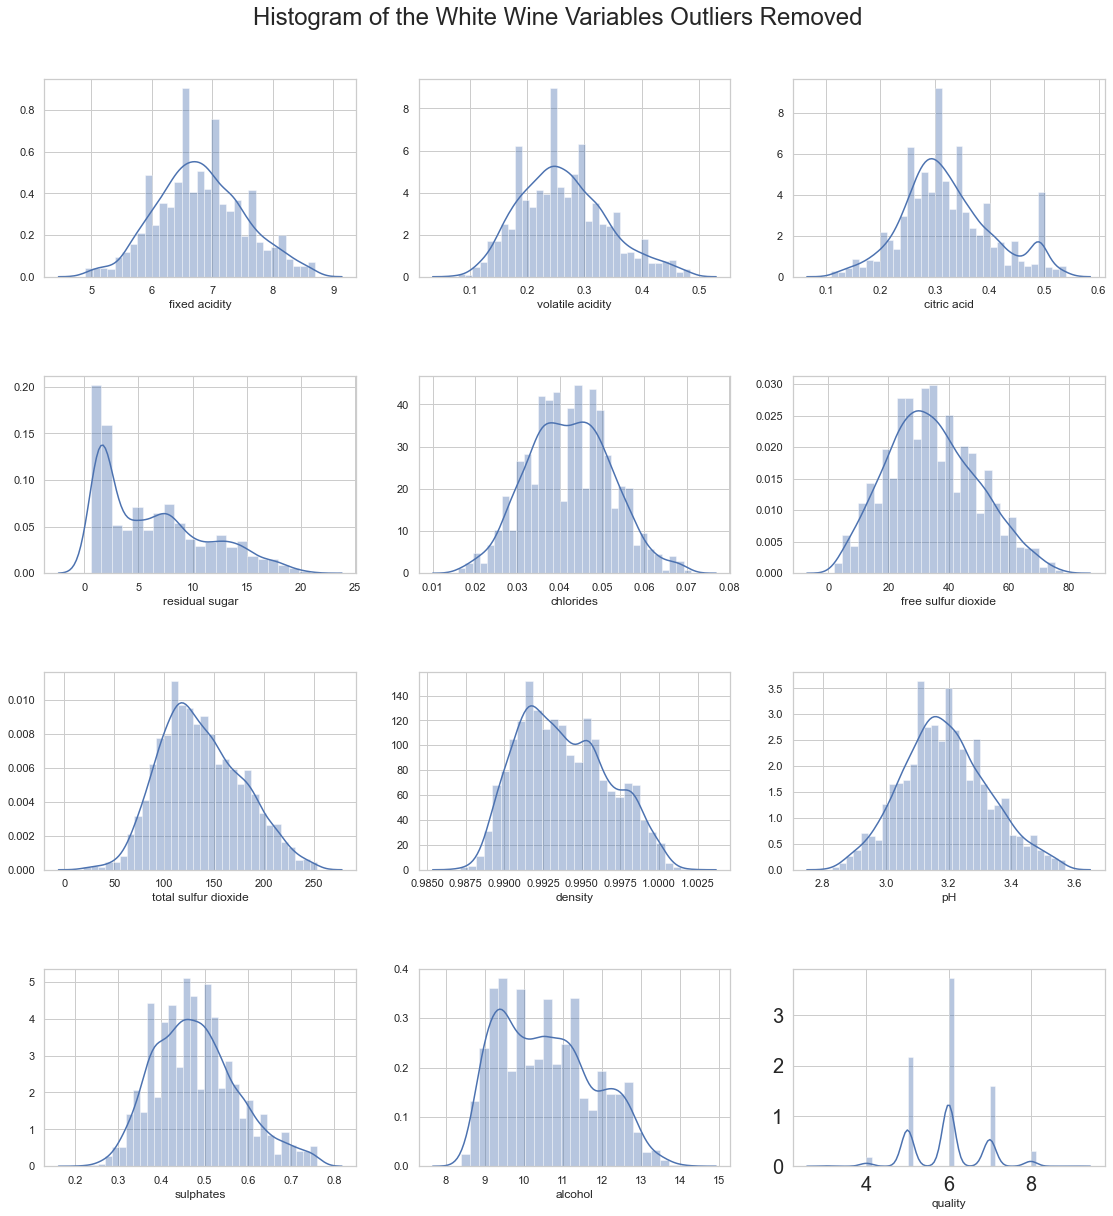

In [44]:
#Historgrams  - outliers removed (df)
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['quality','fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_hist(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variables Outliers Removed")



### Box Plots

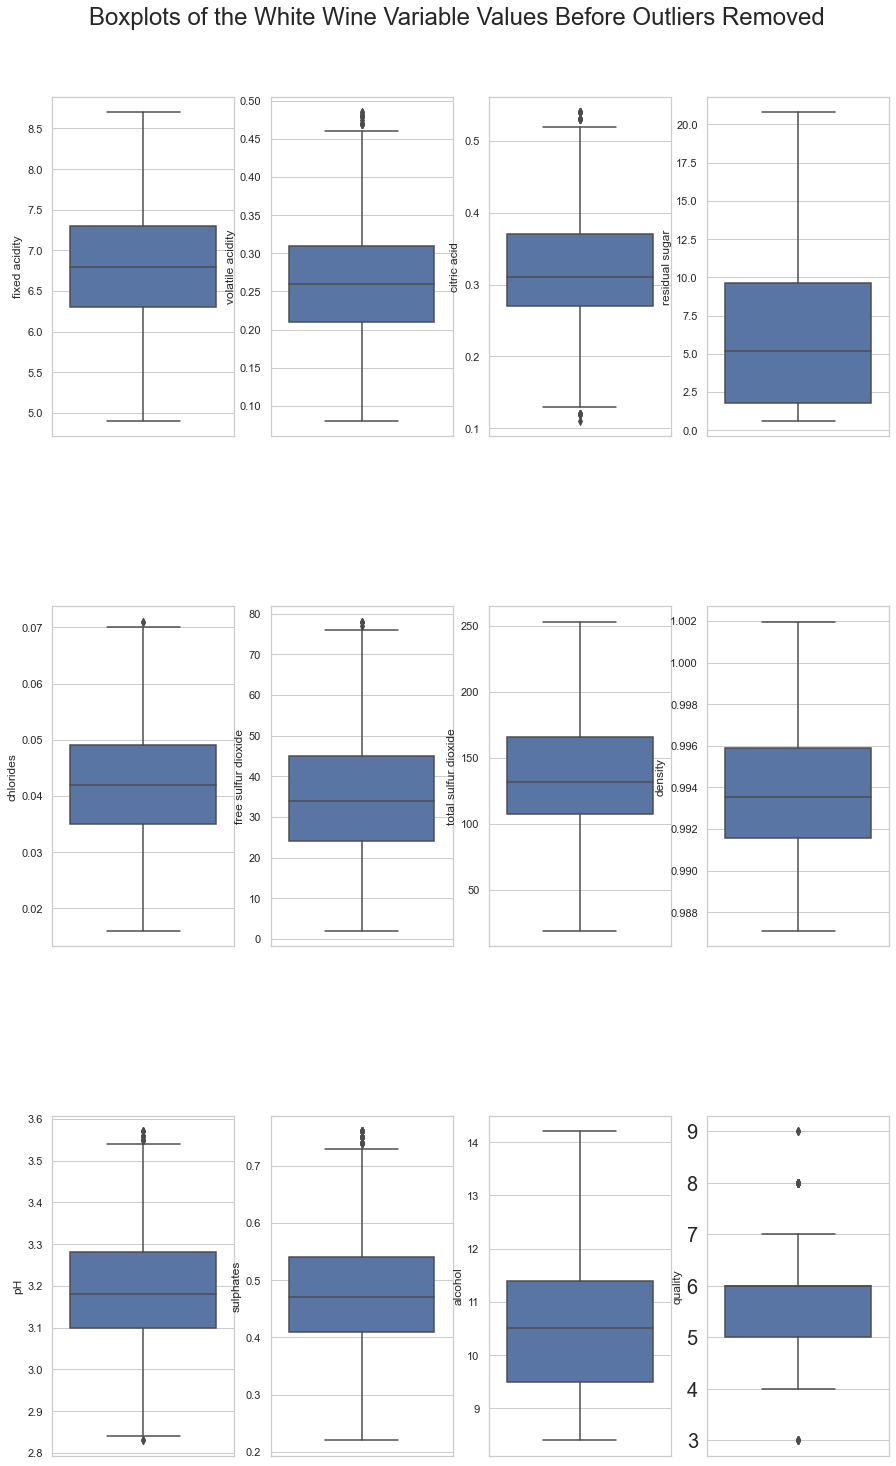

In [45]:
#Boxplots - outliers removed (df)
def subplot_boxPlot(data, row = 3, column = 4, title = "Subplots", height = 25, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.boxplot(df.iloc[:, i], ax=ax, orient='v')
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myBoxplot = subplot_boxPlot(df[plot_columns], row = 3, column = 4, title = "Boxplots of the White Wine Variable Values Before Outliers Removed")



### Computing Skewness

In [46]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('Wine Skewness (after outliers removed)')

skewness_check(df[plot_columns])

Wine Skewness (after outliers removed)


,Column,Skewness,Skew Category
0,fixed acidity,0.146110,Light Skewed
1,volatile acidity,0.427268,Light Skewed
2,citric acid,0.394712,Light Skewed
3,residual sugar,0.738206,Heavily Skewed
4,chlorides,0.098309,Light Skewed
5,free sulfur dioxide,0.280710,Light Skewed
6,total sulfur dioxide,0.301491,Light Skewed
7,density,0.295797,Light Skewed
8,pH,0.208880,Light Skewed
9,sulphates,0.469264,Light Skewed


<h2>Correlation Between Target Variable and Predictor Attributes</h2>

In [47]:
df.corr(method ="spearman")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.423930
pH                      0.067072
citric acid             0.038853
sulphates               0.005869
free sulfur dioxide    -0.001130
fixed acidity          -0.041830
residual sugar         -0.095144
volatile acidity       -0.136401
total sulfur dioxide   -0.203377
chlorides              -0.304291
density                -0.337476
Name: quality, dtype: float64

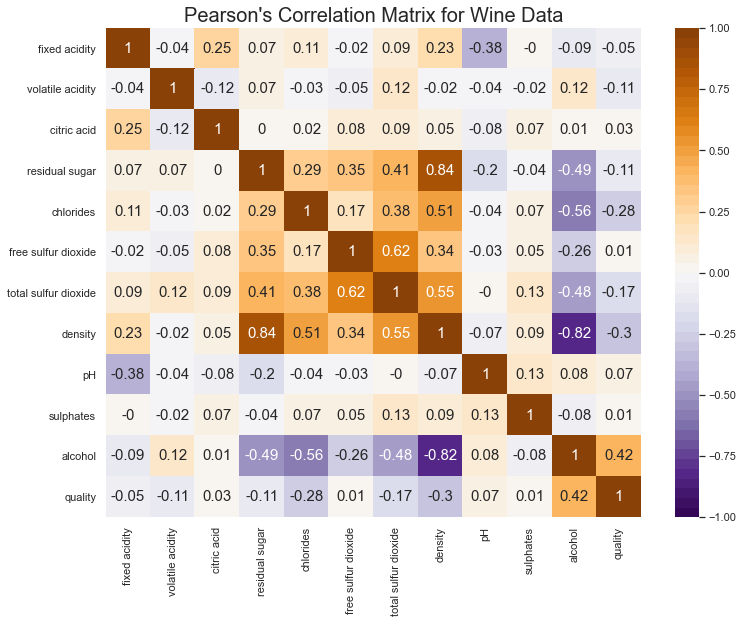

In [48]:
def confusion_matrix_plot(data, title = "Pearson's Correlation Matrix for White Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Pearson's Correlation Matrix for Wine Data")


In [49]:
df.corr(method ="pearson")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.416659
pH                      0.066530
citric acid             0.026268
sulphates               0.014718
free sulfur dioxide     0.013565
fixed acidity          -0.051126
residual sugar         -0.111364
volatile acidity       -0.112981
total sulfur dioxide   -0.174636
chlorides              -0.283634
density                -0.301046
Name: quality, dtype: float64

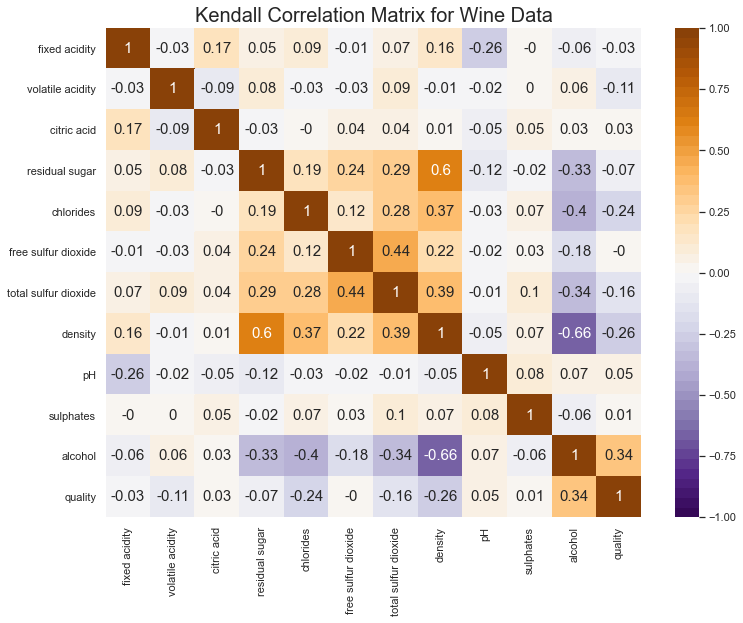

In [50]:
def confusion_matrix_plot(data, title = "Kendall Correlation Matrix for Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Kendall Correlation Matrix for Wine Data")


In [51]:
df.corr(method ="kendall")['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.335053
pH                      0.051769
citric acid             0.031069
sulphates               0.005410
free sulfur dioxide    -0.001216
fixed acidity          -0.032298
residual sugar         -0.072846
volatile acidity       -0.108392
total sulfur dioxide   -0.156118
chlorides              -0.238098
density                -0.258846
Name: quality, dtype: float64

We want to find values that are either highly positively correlated (close to 1) or highly negatively correlated (close to negative 1). Looking at the bottom row (or rightmost column), we can see the correlation coefficients between the target variable, quality, and the indicator variables.  Of course, quality is perfectly correlated with itself, so we will ignore that. 

The most significant correlation coeffients for red wine quality in descending order are (1) alcohol (0.45), (2) density (-0.32), (3) chlorides (-0.30), (4) volatile acidity (-0.26), (5) citric acid (.11), (6) fixed acidity (-0.098), (7) free sulfur dioxide (0.087), (8) total sulfur dioxide (-0.055),(9) pH (-0.033), (10) sulphates (-0.030), and (11) residual sugar (-0.017).

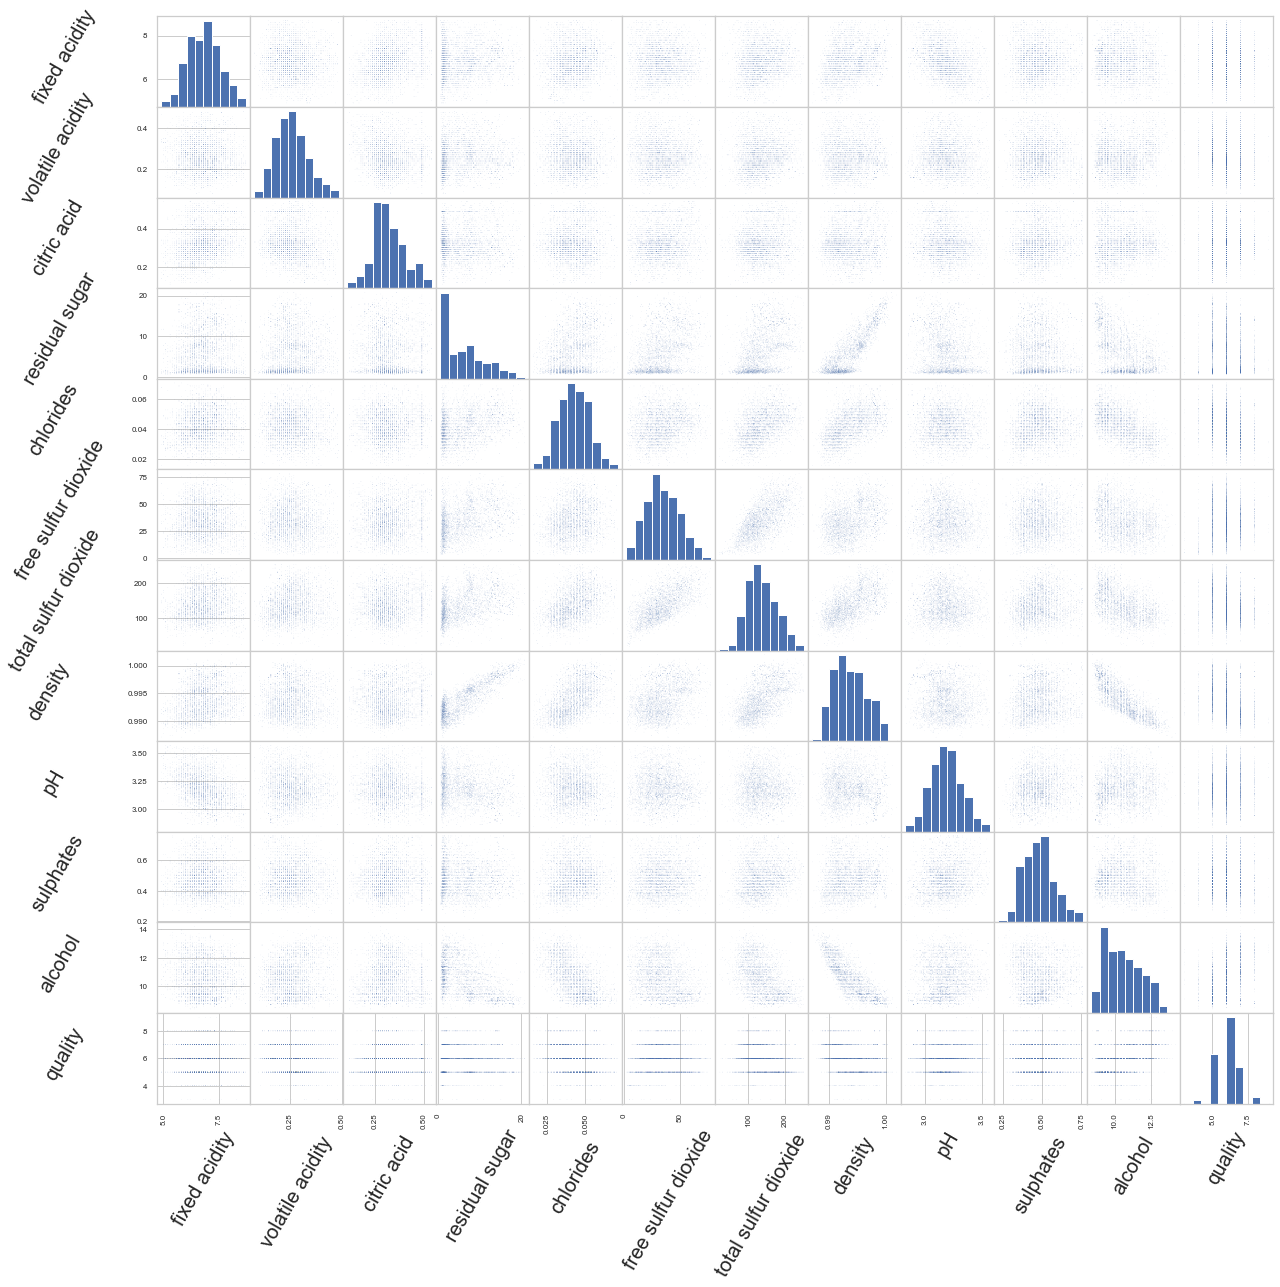

In [52]:
scatter_matrix = pd.plotting.scatter_matrix(
    df,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    


<h2>Wine Quality Indicators</h2>

<h3>1. Alcohol</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol Percent by White Wine Quality Box Plots')]

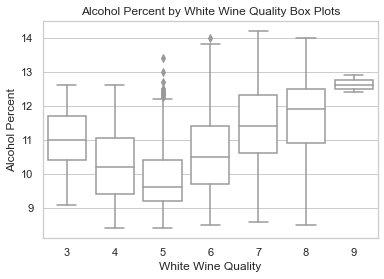

In [53]:
#Quality by Alcohol

myAttribute = 'alcohol'
myYLabel = 'Alcohol Percent'
myNum = '01'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>2. Density</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Density by White Wine Quality Box Plots')]

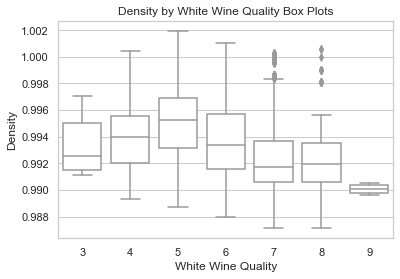

In [54]:
#Quality by Density

myAttribute = 'density'
myYLabel = 'Density'
myNum = '02'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>3. Chlorides</h3>    

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Chlorides'),
 Text(0.5, 1.0, 'Chlorides by White Wine Quality Box Plots')]

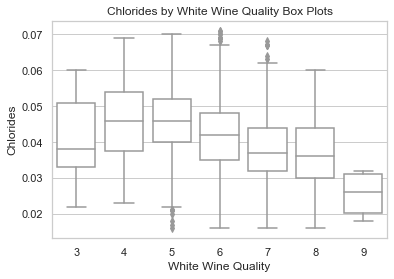

In [55]:
#Quality by Chlorides

myAttribute = 'chlorides'
myYLabel = 'Chlorides'
myNum = '03'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>4. Volatile Acidity</h3>      

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Volatile Acidity'),
 Text(0.5, 1.0, 'Volatile Acidity by White Wine Quality Box Plots')]

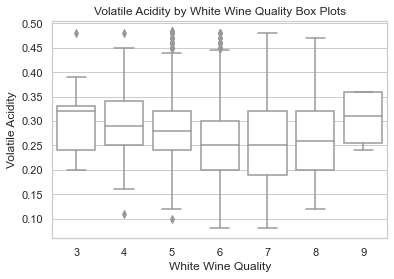

In [56]:
#Quality by Volatile Acidity

myAttribute = 'volatile acidity'
myYLabel = 'Volatile Acidity'
myNum = '04'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>5. Citric Acid</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Citric Acid by White Wine Quality Box Plots')]

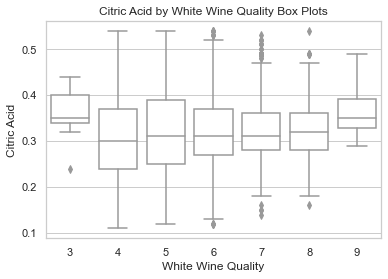

In [57]:
#Quality by Citric Acid

myAttribute = 'citric acid'
myYLabel = 'Citric Acid'
myNum = '05'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>6. Fixed Acidity</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity by White Wine Quality Box Plots')]

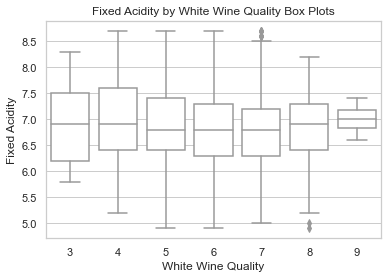

In [58]:
#Quality by Fixed Acidity

myAttribute = 'fixed acidity'
myYLabel = 'Fixed Acidity'
myNum = '06'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>7. Free Sulfur Dioxide</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Free Sulfur Dioxide'),
 Text(0.5, 1.0, 'Free Sulfur Dioxide by White Wine Quality Box Plots')]

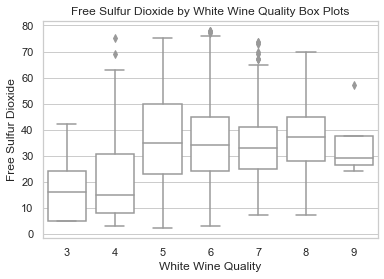

In [59]:
#Quality by Free Sulfur Dioxide

myAttribute = 'free sulfur dioxide'
myYLabel = 'Free Sulfur Dioxide'
myNum = '07'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>8. Total Sulfur Dioxide</h3> 

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Total Sulfur Dioxide'),
 Text(0.5, 1.0, 'Total Sulfur Dioxide by White Wine Quality Box Plots')]

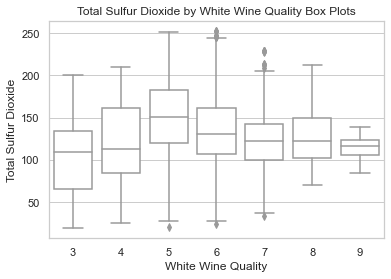

In [60]:
#Quality by Total Sulfur Dioxide

myAttribute = 'total sulfur dioxide'
myYLabel = 'Total Sulfur Dioxide'
myNum = '08'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>9. pH</h3> 

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH by White Wine Quality Box Plots')]

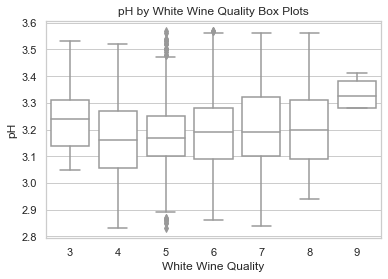

In [61]:
#Quality by pH

myAttribute = 'pH'
myYLabel = 'pH'
myNum = '09'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>10. Sulphates</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates by White Wine Quality Box Plots')]

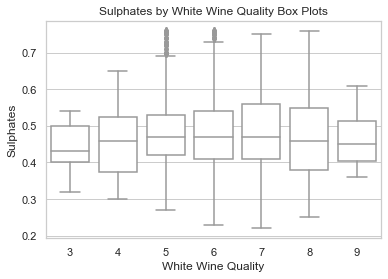

In [62]:
#Quality by Sulphates

myAttribute = 'sulphates'
myYLabel = 'Sulphates'
myNum = '10'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>11. Residual Sugar</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Residual sugar'),
 Text(0.5, 1.0, 'Residual sugar by White Wine Quality Box Plots')]

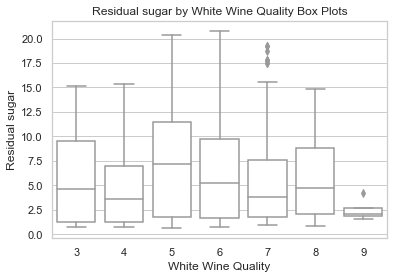

In [63]:
#Quality by Residual Sugar

myAttribute = 'residual sugar'
myYLabel = 'Residual sugar'
myNum = '11'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


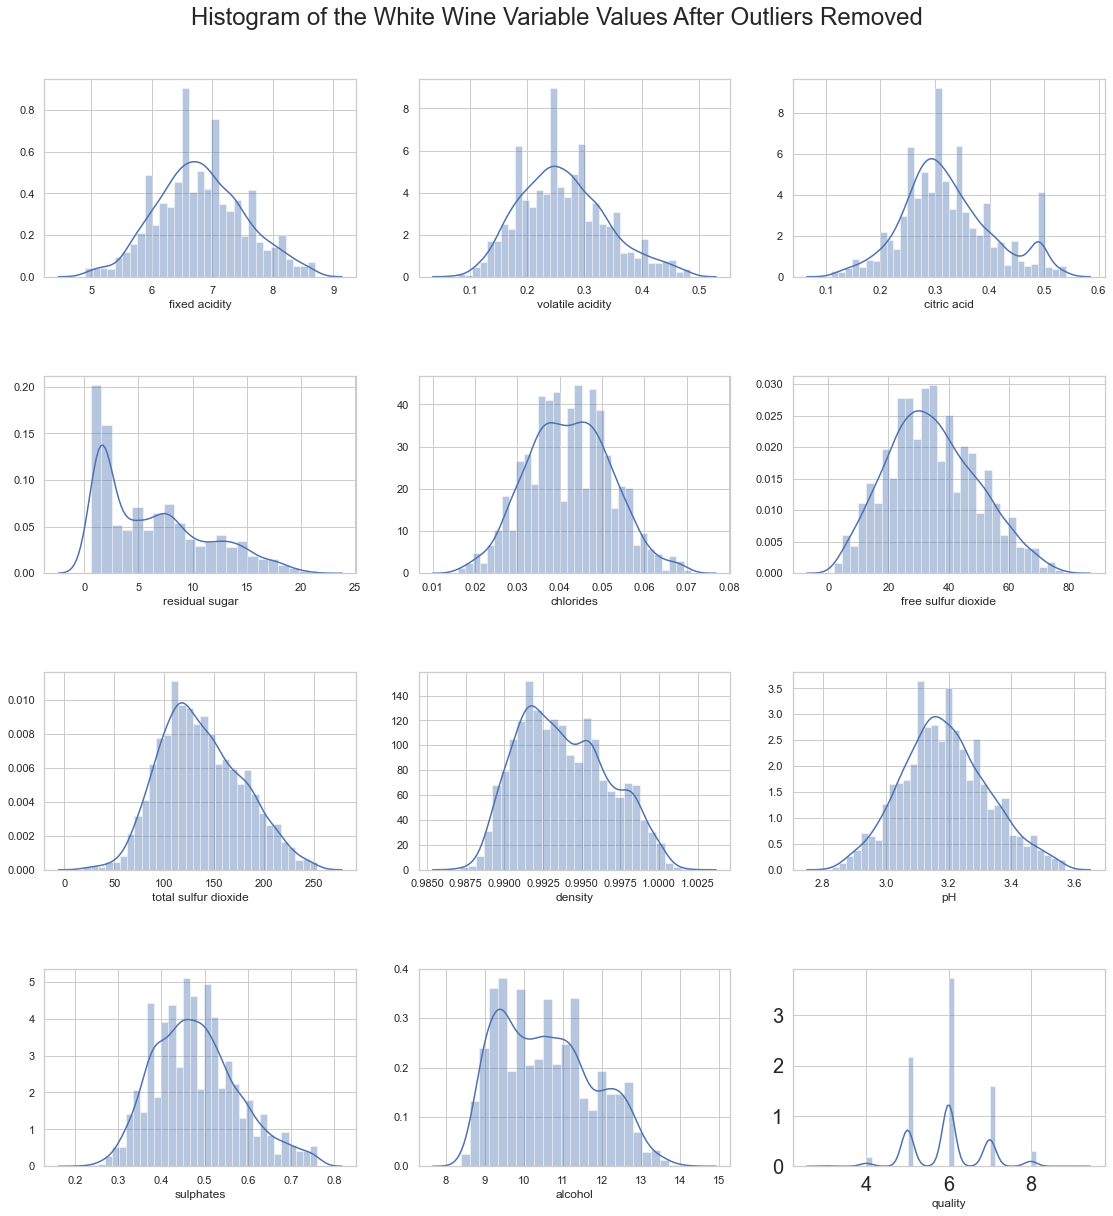

In [64]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    

myhistplot = subplot_hist(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variable Values After Outliers Removed")


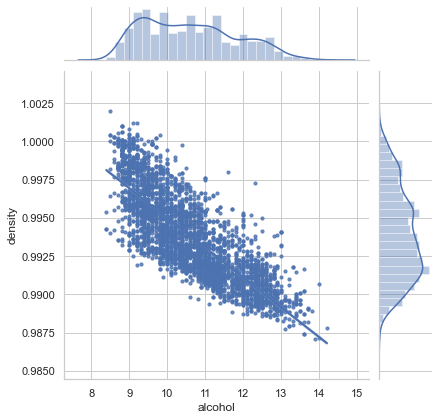

In [65]:
#Plot variables against eaach other
#Plot the histogram for alchol and density against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=df,x='alcohol', y='density',  kind='reg',scatter_kws={'s':10})
plt.show()


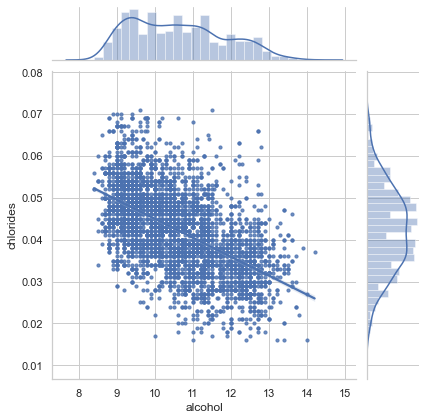

In [66]:
#Plot variables against eaach other
#Plot the histogram for alchol and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

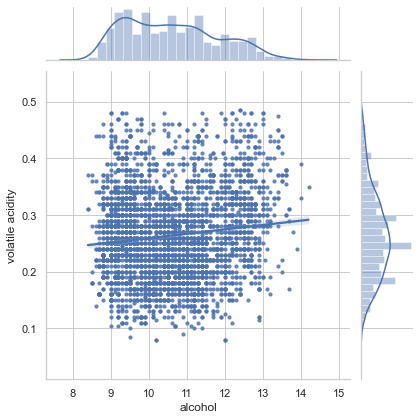

In [67]:
#Plot variables against eaach other
#Plot the histogram for alchol and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

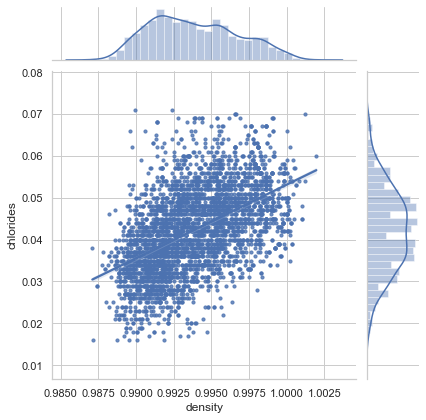

In [68]:
#Plot variables against eaach other
#Plot the histogram for density and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

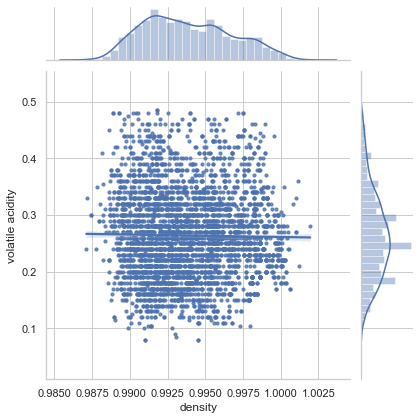

In [69]:
#Plot variables against eaach other
#Plot the histogram for density and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

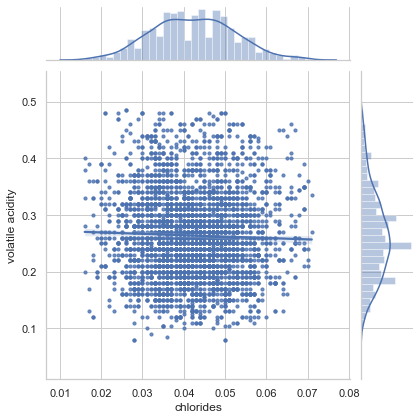

In [70]:
#Plot variables against eaach other
#Plot the histogram for chlorides and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('chlorides', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

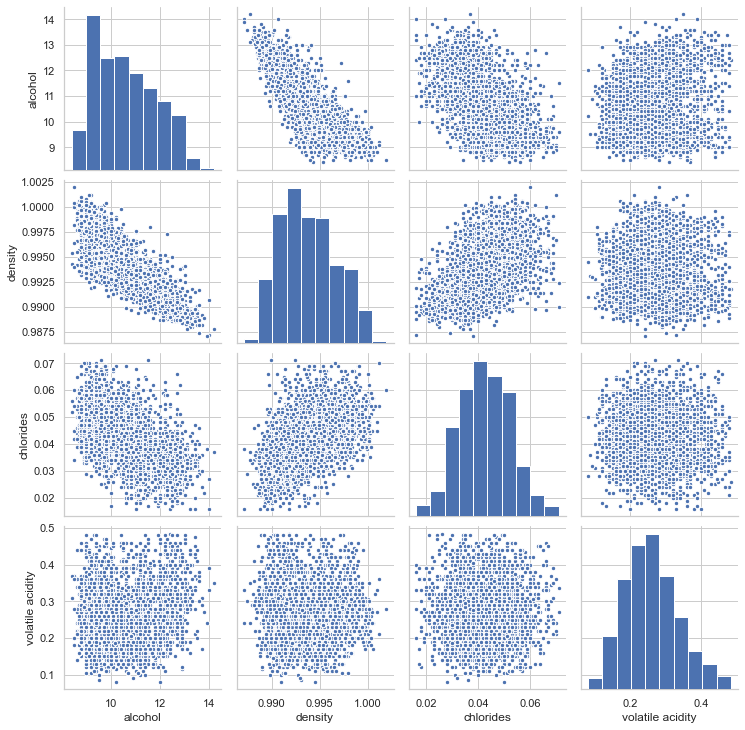

In [71]:

data = df[['alcohol', 'density', 'chlorides', 'volatile acidity']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))